EE399 HW1

Shaunak Bhide

GITHUB: https://github.com/gitbheeds


In [1]:
#import begin
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
#import end

[ 2.17172919 -0.90932558  0.73248889 31.45278064]


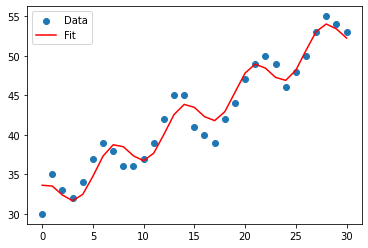

In [2]:
#Consider the following data from the class
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

#Fit the data to the following model with least squared error
#model of form f(x) = Acos(Bx)+Cx+D
def model (C, x) :
    
    #model 
    f_x =  C[0] * np.cos(C[1]*x) + C[2]*x + C[3]

    return f_x

def loss_func(C, x, y):
    return np.sqrt(np.sum((y - model(C, x))**2))

#initial parameter guesses
c0 = np.array([1, np.pi/36, 1, 1])

result = opt.minimize(loss_func, c0, args=(X, Y), method = 'Nelder-Mead')

c_opt = result.x


# Print the optimal parameters
print(c_opt)

# Plot the results
plt.scatter(X, Y, label='Data')
plt.plot(X, model(c_opt, X), 'r-', label='Fit')
plt.legend()
plt.show()

In [3]:
#parameters to sweep through
Aval = np.linspace(0, 3, 3000)
Bval = np.linspace(-3, 3, 3000)
Cval = np.linspace(-0.5, 2, 3000)
Dval = np.linspace(0, 30, 3000)


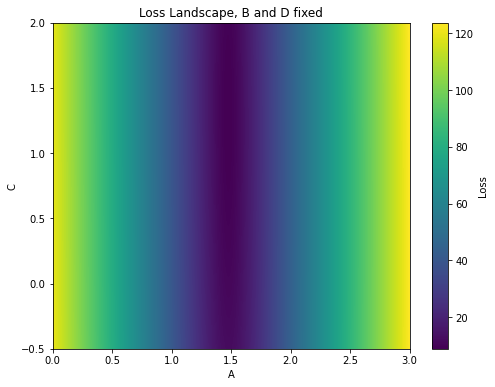

In [4]:

#fix B and D, sweep through A and C
loss_grid = np.zeros((len(Aval), len(Cval)))

#sweep A and C
for i, A in enumerate(Aval):
    for j, C in enumerate(Cval):
        loss = loss_func([A, c_opt[1], C, c_opt[3]], X, Y)
#store the loss value for the given combination of A and C sweeps
        loss_grid[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Cval, loss_grid, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('C')
plt.title('Loss Landscape, B and D fixed')
plt.show()

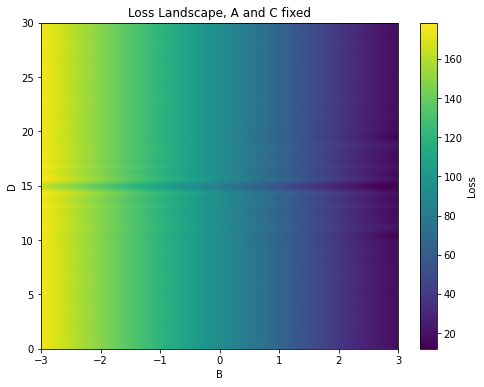

In [5]:
#fix A and C, sweep through B and D
loss_grid1 = np.zeros((len(Bval), len(Dval)))

#sweep A and C
for i, B in enumerate(Bval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], B, c_opt[2], D], X, Y)
#store the loss value for the given combination of B and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Bval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('B')
plt.ylabel('D')
plt.title('Loss Landscape, A and C fixed')
plt.show()

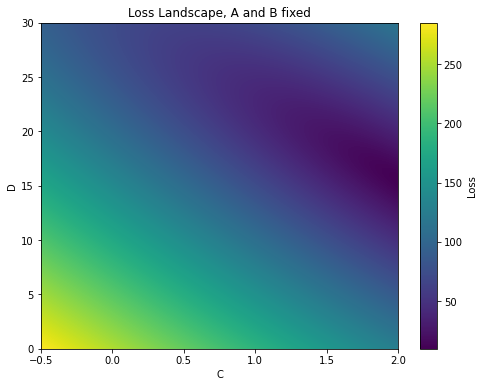

In [6]:
#fix A and B, sweep through C and D
loss_grid1 = np.zeros((len(Cval), len(Dval)))

#sweep C and D
for i, C in enumerate(Cval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], c_opt[1], C, D], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Cval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('C')
plt.ylabel('D')
plt.title('Loss Landscape, A and B fixed')
plt.show()

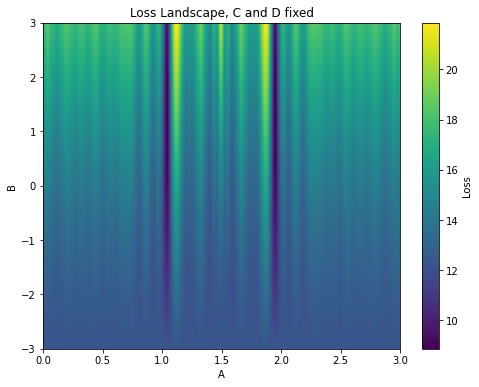

In [7]:
#fix C and D, sweep through A and B
loss_grid1 = np.zeros((len(Aval), len(Bval)))

#sweep A and B
for i, A in enumerate(Aval):
    for j, B in enumerate(Bval):
        loss = loss_func([A, B, c_opt[2], c_opt[3]], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Bval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss Landscape, C and D fixed')
plt.show()

Using the first 20 data points as training data, fit a line, parabola and 19th degree
polynomial to the data. Compute the least-square error for each of these over the training
points. Then compute the least square error of these models on the test data which are
the remaining 10 data points.

In [8]:
#training and test data
trainingX = X[:20]
trainingY = Y[:20]
testX = X[20:]
testY = Y[20:]

In [14]:
#model definitions

def line(C, x) :
    return C[0]*x + C[1]

def parabola(C, x) :
    return (C[0]*x)**2 + C[1]*x + C[2]

def deg19(C, x) : 
    result = np.zeros(len(x))
    for i, X in enumerate(x) :
        for j in range(len(C)) :
            result[i] += C[j] *( X ** j)

    return result


def loss_func_line(C, x, y):

    return np.sqrt(np.sum((y - line(C, x))**2))

def loss_func_par(C, x, y) : 

    return np.sqrt(np.sum((y - parabola(C, x))**2))
    
def loss_func_poly(C, x, y) :

    return np.sqrt(np.sum((y - deg19(C, x))**2))


In [24]:
c_l = [1, 1]
model_l = line(c_l, trainingX)

c_p = [1, 1, 1]
model_p = parabola(c_p, trainingX)

c_19 = np.ones(19)
model_19 = deg19(c_19, trainingX)

result_line = opt.minimize(loss_func_line, c_l, args=(X, Y), method = 'Nelder-Mead')

c_lo = result_line.x


result_par = opt.minimize(loss_func_par, c_p, args=(X, Y), method = 'Nelder-Mead')

c_po = result_par.x


result_poly= opt.minimize(loss_func_poly, c_19, args=(X, Y), method = 'Nelder-Mead')

c_plyo = result_poly.x


#Display results of loss function
loss_line = loss_func_line(c_lo, trainingX, trainingY)

loss_par = loss_func_par(c_po, trainingX, trainingY)

loss_poly = loss_func_poly(c_plyo, trainingX, trainingY)

#test data
loss_line_t = loss_func_line(c_lo, testX, testY)

loss_par_t = loss_func_par(c_po, testX, testY)

loss_poly_t = loss_func_poly(c_plyo, testX, testY)
print("Training Data Loss functions \n")
print(" Loss function from line fit ", loss_line, "\n",
      "Loss function from parabola fit ", loss_par, "\n",
      "Loss function from polynomial fit ", loss_poly, "\n")

print("Test Data Loss functions \n")
print(" Loss function from line fit ", loss_line_t, "\n",
      "Loss function from parabola fit ", loss_par_t, "\n",
      "Loss function from polynomial fit ", loss_poly_t)


Training Data Loss functions 

 Loss function from line fit  10.657900906912204 
 Loss function from parabola fit  10.484645918062252 
 Loss function from polynomial fit  9968759.08911398 

Test Data Loss functions 

 Loss function from line fit  6.150979718217298 
 Loss function from parabola fit  6.130505357644006 
 Loss function from polynomial fit  15594457.443979034


In [30]:
trainingX = X[:10] + X[-10:]
trainingY = Y[:10] + Y[-10:]

testX = X[10:21]
testY = Y[10:21]




result_line = opt.minimize(loss_func_line, c_l, args=(X, Y), method = 'Nelder-Mead')

c_lo = result_line.x


result_par = opt.minimize(loss_func_par, c_p, args=(X, Y), method = 'Nelder-Mead')

c_po = result_par.x


result_poly= opt.minimize(loss_func_poly, c_19, args=(X, Y), method = 'Nelder-Mead')

c_plyo = result_poly.x


#Display results of loss function
loss_line = loss_func_line(c_lo, trainingX, trainingY)

loss_par = loss_func_par(c_po, trainingX, trainingY)

loss_poly = loss_func_poly(c_plyo, trainingX, trainingY)

#test data
loss_line_t = loss_func_line(c_lo, testX, testY)

loss_par_t = loss_func_par(c_po, testX, testY)

loss_poly_t = loss_func_poly(c_plyo, testX, testY)
print("Training Data Loss functions \n")
print(" Loss function from line fit ", loss_line, "\n",
      "Loss function from parabola fit ", loss_par, "\n",
      "Loss function from polynomial fit ", loss_poly, "\n")

print("Test Data Loss functions \n")
print(" Loss function from line fit ", loss_line_t, "\n",
      "Loss function from parabola fit ", loss_par_t, "\n",
      "Loss function from polynomial fit ", loss_poly_t, "\n")

print("This is worse than the original training data and test data")

Training Data Loss functions 

 Loss function from line fit  102.33701288458596 
 Loss function from parabola fit  99.6122594520859 
 Loss function from polynomial fit  1432768992.512961 

Test Data Loss functions 

 Loss function from line fit  8.961218750437636 
 Loss function from parabola fit  8.77826804767743 
 Loss function from polynomial fit  9346054.118915487 

This is worse than the original training data and test data
